<a href="https://colab.research.google.com/github/AgainstEntropy/ECE-GY-6143-ML/blob/main/3_gradient_descent_deep_dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient descent in depth

*Fraida Fund*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import seaborn as sns
sns.set()
colors = sns.color_palette("hls", 4)

# for 3d interactive plots
from ipywidgets import interact, fixed, widgets
from mpl_toolkits import mplot3d

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Gradient descent for simple linear regression

### Generate data

In [ ]:
def generate_linear_regression_data(n=100, d=1, coef=[5], intercept=1, sigma=0):
  x = np.random.randn(n,d)
  y = (np.dot(x, coef) + intercept).squeeze() + sigma * np.random.randn(n)
  return x, y

In [ ]:
# y = 2 + 3x
w_true = np.array([2, 3])
n_samples = 100

In [ ]:
x, y = generate_linear_regression_data(n=n_samples, d=1, coef=w_true[1:], intercept= w_true[0])

In [ ]:
# create the "design matrix" with a ones column at beginning
X = np.hstack((np.ones((n_samples, 1)), x))
X.shape

(100, 2)

### Define a descent step

In each gradient descent step, we will compute

$$
w^{t+1} = w^t - \alpha^t \nabla L(w^t)  
$$

With a mean squared error loss function

$$
\begin{aligned}
L(w) &= \frac{1}{n} \sum_{i=1}^n (y_i - \langle w,x_i \rangle)^2 \\
     &= \frac{1}{n} \|y - Xw\|^2
\end{aligned}
$$

we will compute the weights at each step as

$$
\begin{aligned}
w^{t+1} &= w^t + \frac{\alpha^t}{n} \sum_{i=1}^n (y_i - \langle w^t,x_i \rangle) x_i \\
        &= w^t + \frac{\alpha^t}{n} X^T (y - X w^t)                  
\end{aligned}
$$

In [ ]:
def gd_step(w, X, y, lr):
  # use current parameters to get y_hat
  y_hat = np.dot(X,w)
  error = y_hat-y
  # compute gradient for this y_hat
  grad = np.matmul(X.T, error)
  # update weights
  w_new = w - (lr/X.shape[0])*grad

  # we don't have to actually compute MSE
  # but I want to, for visualization
  mse = np.mean(error**2, axis=0)

  return (w_new, mse, grad)

Note: in the update rule, the signs are different from the expression above because we switched the order of the terms in the error expression: we used $\hat{y} - y$.

### Perform gradient descent

In [ ]:
# gradient descent settings: number of iterations, learning rate, starting point
itr = 50
lr = 0.08
w_init = np.random.uniform(3,7,len(w_true))
print(w_init)

[5.44889955 6.47472236]


In [ ]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient

### Visualize

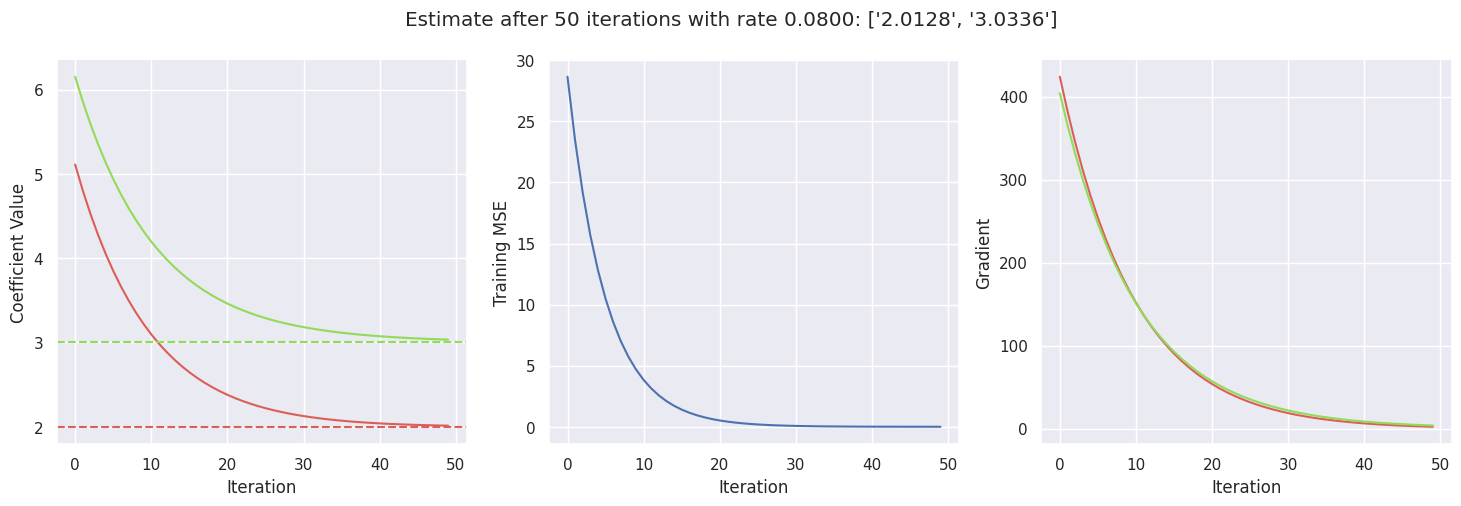

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1);

for n, w in enumerate(w_true):
  plt.axhline(y=w, linestyle='--', color=colors[n]);
  sns.lineplot(x=np.arange(itr), y=w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

plt.subplot(1,3, 2);
sns.lineplot(x=np.arange(itr), y=mse_steps);
#plt.yscale("log")
plt.xlabel("Iteration");
plt.ylabel("Training MSE");


plt.subplot(1, 3, 3);
for n, w in enumerate(w_true):
  sns.lineplot(x=np.arange(itr), y=grad_steps[:,n], color=colors[n]);
plt.xlabel("Iteration");
plt.ylabel("Gradient");

plt.suptitle("Estimate after %d iterations with rate %s: %s" %
          (itr, "{0:0.4f}".format(lr), ["{0:0.4f}".format(w) for w in w_star]));

### Other things to try

-   What happens if we increase the learning rate?
-   What happens if we decrease the learning rate?

### Descent path on MSE contour

Generating data for a multiple regression (with two features):

In [ ]:
w_true = [2, 6, 5]
n_samples = 100
x, y = generate_linear_regression_data(n=n_samples, d=2, coef=w_true[1:], intercept=w_true[0])
X = np.hstack((np.ones((n_samples, 1)), x))
X.shape

(100, 3)

In [ ]:
# gradient descent settings: number of iterations, learning rate, starting point
itr = 50
lr = 0.1
w_init = np.random.uniform(3, 7, len(w_true))
print(w_init)

[5.61841316 4.76465058 3.35159345]


In [ ]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient

In [ ]:
coefs = np.arange(2, 8, 0.05)

coef_grid = np.array(np.meshgrid(coefs, coefs)).reshape(1, 2, coefs.shape[0], coefs.shape[0])
y_hat_c = (w_true[0] + np.sum(coef_grid * x.reshape(x.shape[0], 2, 1, 1), axis=1) )
mses_coefs = np.mean((y.reshape(-1, 1, 1)- y_hat_c)**2,axis=0)

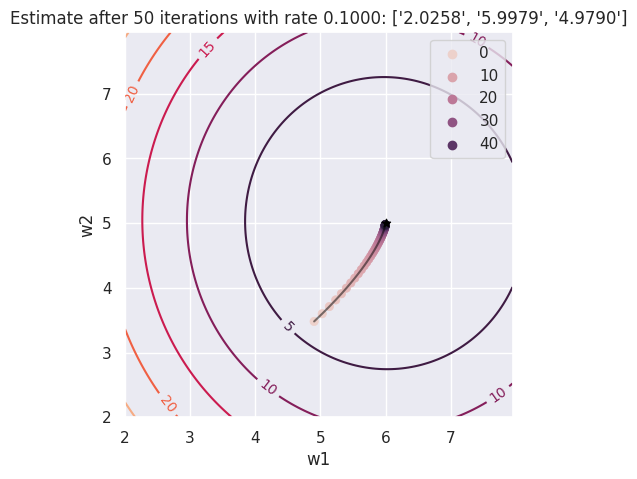

In [ ]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w1');
plt.ylabel('w2');
sns.lineplot(x=w_steps[:,1], y=w_steps[:,2], color='black', sort=False, alpha=0.5);
sns.scatterplot(x=w_steps[:,1], y=w_steps[:,2], hue=np.arange(itr), edgecolor=None);
plt.scatter(w_true[1], w_true[2], c='black', marker='*');
plt.title("Estimate after %d iterations with rate %s: %s" % (itr, "{0:0.4f}".format(lr), ["{0:0.4f}".format(w) for w in w_star]));


In [ ]:
def plot_3D(elev=20, azim=-20, X1=X1, X2=X2, mses_coefs=mses_coefs,
            w_steps=w_steps, mse_steps=mse_steps):

    plt.figure(figsize=(10,10))
    ax = plt.subplot(projection='3d')

    # Plot the surface.
    ax.plot_surface(X1, X2, mses_coefs, alpha=0.5, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)
    ax.scatter3D(w_steps[:, 1], w_steps[:, 2], mse_steps, s=5, color='black')
    ax.plot(w_steps[:, 1], w_steps[:, 2], mse_steps, color='gray')

    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('MSE')

    plt.show()

interact(plot_3D, elev=widgets.IntSlider(min=-90, max=90, step=10, value=20),
          azim=widgets.IntSlider(min=-90, max=90, step=10, value=20),
         X1=fixed(X1), X2=fixed(X2), mses_coefs=fixed(mses_coefs),
         w_steps=fixed(w_steps), mse_steps=fixed(mse_steps));

interactive(children=(IntSlider(value=20, description='elev', max=90, min=-90, step=10), IntSlider(value=20, d…

## Stochastic gradient descent

For stochastic gradient descent, we will compute the gradient and update the weights using one sample (or a mini-batch of samples) in each step.

**A note on sampling**: In practice, the samples are often sampled without replacement, but the statistical guarantee of convergence is for sampling with replacement. In this example, we sample with replacement. You can read more about different varieties of gradient descent and stochastic gradient descent in [How is stochastic gradient descent implemented in the context of machine learning and deep learning](https://sebastianraschka.com/faq/docs/sgd-methods.html).

### Define a stochastic descent step

In [ ]:
def sgd_step(w, X, y, lr, n):

  idx_sample = np.random.choice(X.shape[0], n, replace=True)

  X_sample = X[idx_sample, :]
  y_sample = y[idx_sample]

  # use current parameters to get y_hat
  y_hat = np.dot(X_sample,w)
  error = y_hat-y_sample
  # compute gradient for this y_hat
  grad = np.matmul(X_sample.T, error)
  # update weights
  w_new = w - (lr/n)*grad

  # we don't have to actually compute MSE
  # but I want to, for visualization
  # note: MSE is computed on entire data, not sample
  mse = np.mean((y-np.dot(X, w))**2, axis=0)

  return (w_new, mse, grad)

### Perform stochastic gradient descent

In [ ]:
# now we have another gradient descent option: how many samples in a "batch"
itr = 50
lr = 0.1
n_batch = 1
w_init = [w_true[0], 2, 8]

In [ ]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)

w_star = w_init
for i in range(itr):
  w_star, mse, grad = sgd_step(w_star, X, y, lr, n_batch)
  w_steps[i] = w_star
  mse_steps[i] = mse

### Visualize

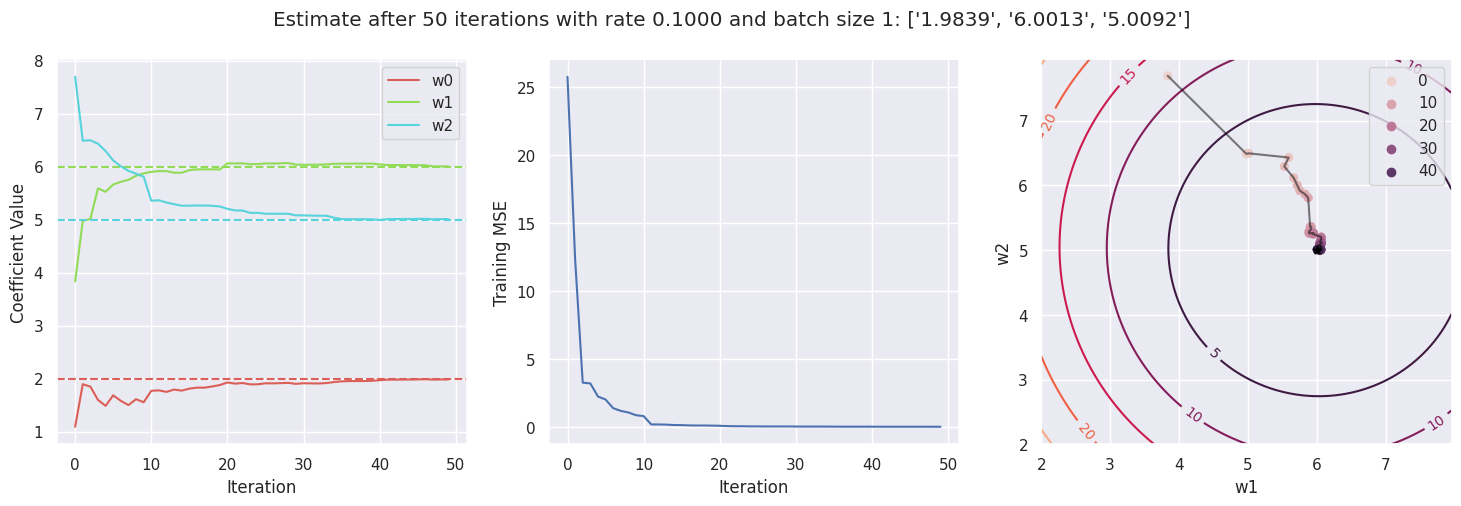

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1);

for n, w in enumerate(w_true):
  plt.axhline(y=w, linestyle='--', color=colors[n]);
  sns.lineplot(x=np.arange(itr), y=w_steps[:,n], color=colors[n], label='w' + str(n));
plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

plt.subplot(1, 3, 2);
sns.lineplot(x=np.arange(itr), y=mse_steps);
#plt.yscale("log")
plt.xlabel("Iteration");
plt.ylabel("Training MSE");


plt.subplot(1, 3, 3);
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w1');
plt.ylabel('w2');
sns.lineplot(x=w_steps[:,1], y=w_steps[:,2], color='black', sort=False, alpha=0.5);
sns.scatterplot(x=w_steps[:,1], y=w_steps[:,2], hue=np.arange(itr), edgecolor=None);
plt.scatter(w_true[1], w_true[2], c='black', marker='*');

plt.suptitle("Estimate after %d iterations with rate %s and batch size %d: %s" %
            (itr, "{0:0.4f}".format(lr), n_batch, ["{0:0.4f}".format(w) for w in w_star]));

In [ ]:
def plot_3D(elev=20, azim=-20, X1=X1, X2=X2, mses_coefs=mses_coefs,
            w_steps=w_steps, mse_steps=mse_steps):

    plt.figure(figsize=(10,10))
    ax = plt.subplot(projection='3d')


    # Plot the surface.
    ax.plot_surface(X1, X2, mses_coefs, alpha=0.5, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)
    ax.scatter3D(w_steps[:, 1], w_steps[:, 2], mse_steps, s=5, color='black')
    ax.plot(w_steps[:, 1], w_steps[:, 2], mse_steps, color='gray')


    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('MSE')

    plt.show()

interact(plot_3D, elev=widgets.IntSlider(min=-90, max=90, step=10, value=20),
          azim=widgets.IntSlider(min=-90, max=90, step=10, value=20),
         X1=fixed(X1), X2=fixed(X2), mses_coefs=fixed(mses_coefs),
         w_steps=fixed(w_steps), mse_steps=fixed(mse_steps));


interactive(children=(IntSlider(value=20, description='elev', max=90, min=-90, step=10), IntSlider(value=20, d…

### Other things to try

-   Increase number of samples used in each iteration?
-   Increase learning rate?
-   Decrease learning rate?
-   Use decaying learning rate $\alpha^t = \frac{\alpha_0}{1 + kt}$?

## Gradient descent with noise

### Generate noisy data

This time, we will use the `sigma` argument in our `generate_linear_regression_data` function to generate data that does not perfectly fit a linear model. (Using the same coefficients as the previous example.)

In [ ]:
x, y = generate_linear_regression_data(n=n_samples, d=2, coef=w_true[1:], intercept=w_true[0], sigma=3)
X = np.column_stack((np.ones((n_samples, 1)), x))

### Perform gradient descent on noisy data

In [ ]:
itr = 50
lr = 0.05
w_init = [w_true[0], 2, 8]

In [ ]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse

### Visualize gradient descent on noisy data

This time, the gradient descent may not necessarily arrive at the “true” coefficient values. That’s not because it does not find the coefficients with minimum MSE; it’s because the coefficients with minimum MSE on the noisy training data are not necessarily the “true” coefficients.

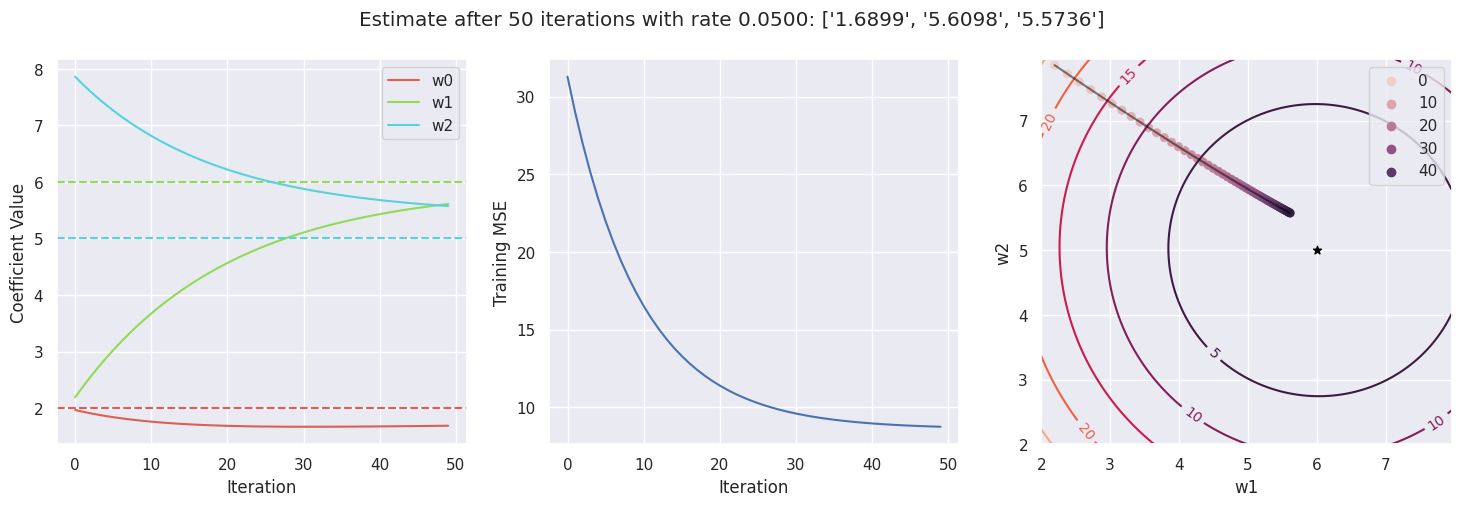

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1);

for n, w in enumerate(w_true):
  plt.axhline(y=w, linestyle='--', color=colors[n]);
  sns.lineplot(x=np.arange(itr), y=w_steps[:,n], color=colors[n], label='w' + str(n));
plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

plt.subplot(1, 3, 2);
sns.lineplot(x=np.arange(itr), y=mse_steps);
#plt.yscale("log")
plt.xlabel("Iteration");
plt.ylabel("Training MSE");

plt.subplot(1, 3, 3);
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w1');
plt.ylabel('w2');
sns.lineplot(x=w_steps[:,1], y=w_steps[:,2], color='black', sort=False, alpha=0.5);
sns.scatterplot(x=w_steps[:,1], y=w_steps[:,2], hue=np.arange(itr), edgecolor=None);
plt.scatter(w_true[1], w_true[2], c='black', marker='*');

plt.suptitle("Estimate after %d iterations with rate %s: %s" %
          (itr, "{0:0.4f}".format(lr), ["{0:0.4f}".format(w) for w in w_star]));

### Perform stochastic gradient descent on noisy data

In [ ]:
itr = 100
lr = 0.05
n_batch = 10
w_init = [w_true[0], 2, 8]

In [ ]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)

w_star = w_init
for i in range(itr):
  w_star, mse, grad = sgd_step(w_star, X, y, lr, n_batch)
  w_steps[i] = w_star
  mse_steps[i] = mse

### Visualize stochastic gradient descent

Note the “noise ball”!

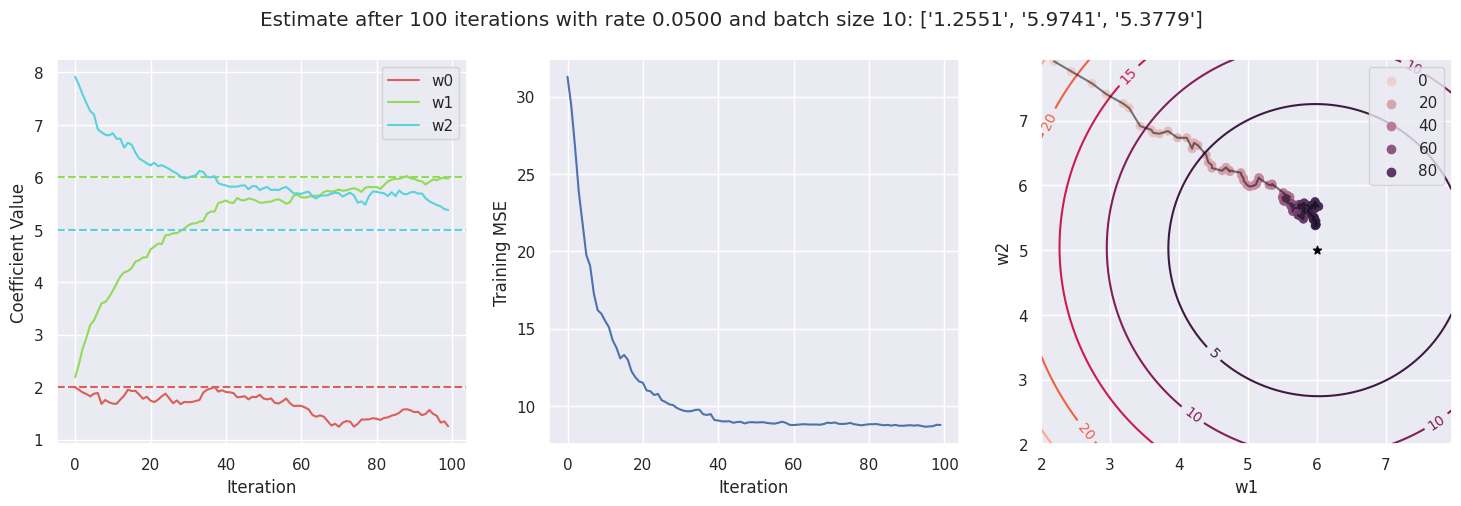

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1);

for n, w in enumerate(w_true):
  plt.axhline(y=w, linestyle='--', color=colors[n]);
  sns.lineplot(x=np.arange(itr), y=w_steps[:,n], color=colors[n], label='w' + str(n));
plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

plt.subplot(1, 3, 2);
sns.lineplot(x=np.arange(itr), y=mse_steps);
#plt.yscale("log")
plt.xlabel("Iteration");
plt.ylabel("Training MSE");

plt.subplot(1, 3, 3);
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w1');
plt.ylabel('w2');
sns.lineplot(x=w_steps[:,1], y=w_steps[:,2], color='black', sort=False, alpha=0.5);
sns.scatterplot(x=w_steps[:,1], y=w_steps[:,2], hue=np.arange(itr), edgecolor=None);
plt.scatter(w_true[1], w_true[2], c='black', marker='*');

plt.suptitle("Estimate after %d iterations with rate %s and batch size %d: %s" %
            (itr, "{0:0.4f}".format(lr), n_batch, ["{0:0.4f}".format(w) for w in w_star]));


## Interactive

You can use this interactive to explore different gradient descent options and see the effect.

In [ ]:
n_samples = 100
w_true = [2, 6, 5]
x, y = generate_linear_regression_data(n=n_samples, d=2, coef=w_true[1:], intercept=w_true[0], sigma=0)
X = np.hstack((np.ones((n_samples, 1)), x))

@interact(itr = widgets.IntSlider(min=10, max=200, step=10, value=100),
          lr = widgets.FloatSlider(min=0.05, max=0.95, step=0.05, value=0.1),
          n_batch = widgets.IntSlider(min=1, max=100, step=1, value=100),
          sigma = widgets.FloatSlider(min=0, max=5, step=0.5, value=1),
          X = fixed(X), y = fixed(y))
def plot_gd(itr, lr, n_batch, sigma, X, y):

  y = y + sigma * np.random.randn(n_samples)

  w_init = [w_true[0], 3, 7]
  w_steps = np.zeros((itr, len(w_init)))
  mse_steps = np.zeros(itr)

  w_star = w_init
  for i in range(itr):
    w_star, mse, grad = sgd_step(w_star, X, y, lr, n_batch)
    w_steps[i] = w_star
    mse_steps[i] = mse

  plt.figure(figsize=(18,5))
  plt.subplot(1,3,1);

  for n, w in enumerate(w_true):
    plt.axhline(y=w, linestyle='--', color=colors[n]);
    sns.lineplot(x=np.arange(itr), y=w_steps[:,n], color=colors[n], label='w' + str(n));
  plt.xlabel("Iteration");
  plt.ylabel("Coefficient Value");

  plt.subplot(1, 3, 2);
  sns.lineplot(x=np.arange(itr), y=mse_steps);
  #plt.yscale("log")
  plt.xlabel("Iteration");
  plt.ylabel("Training MSE");

  plt.subplot(1, 3, 3);
  X1, X2 = np.meshgrid(coefs, coefs);
  p = plt.contour(X1, X2, mses_coefs, levels=5);
  plt.clabel(p, inline=1, fontsize=10);
  plt.xlabel('w1');
  plt.ylabel('w2');
  sns.lineplot(x=w_steps[:,1], y=w_steps[:,2], color='black', sort=False, alpha=0.5);
  sns.scatterplot(x=w_steps[:,1], y=w_steps[:,2], hue=np.arange(itr), edgecolor=None);
  plt.scatter(w_true[1], w_true[2], c='black', marker='*');

  plt.suptitle("Estimate after %d iterations with rate %s and batch size %d: %s" %
              (itr, "{0:0.4f}".format(lr), n_batch, ["{0:0.4f}".format(w) for w in w_star]));

  plt.show()

interactive(children=(IntSlider(value=100, description='itr', max=200, min=10, step=10), FloatSlider(value=0.1…

## A less friendly loss surface

In [ ]:
w_true = [2, 5, 4]

In [ ]:
n_samples = 1000
d = 1
sigma = 1

x1 = np.random.randn(n_samples,d)
x2 = x1 + (sigma/5)*np.random.randn(n_samples,1)
x = np.column_stack([x1, x2])
y = (np.dot(x, w_true[1:]) + w_true[0]).squeeze() + sigma * np.random.randn(n_samples)


X = np.column_stack((np.ones((n_samples, 1)), x))

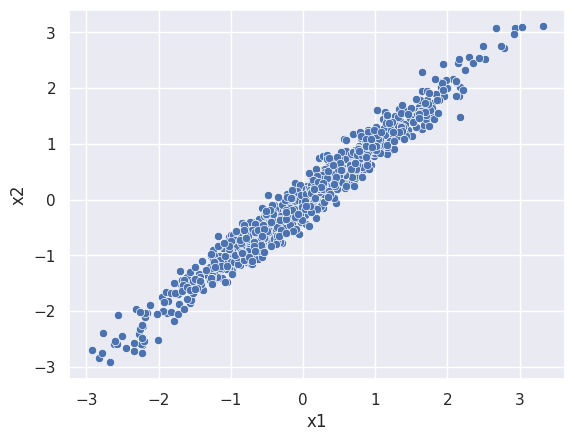

In [ ]:
sns.scatterplot(x=x1.squeeze(), y=x2.squeeze());
plt.xlabel('x1');
plt.ylabel('x2');

### MSE contour

In [ ]:
coefs = np.arange(3, 7, 0.02)

coef_grid = np.array(np.meshgrid(coefs, coefs)).reshape(1, 2, coefs.shape[0], coefs.shape[0])
y_hat_c = (w_true[0] + np.sum(coef_grid * x.reshape(x.shape[0], 2, 1, 1), axis=1) )
mses_coefs = np.mean((y.reshape(-1, 1, 1)- y_hat_c)**2,axis=0)

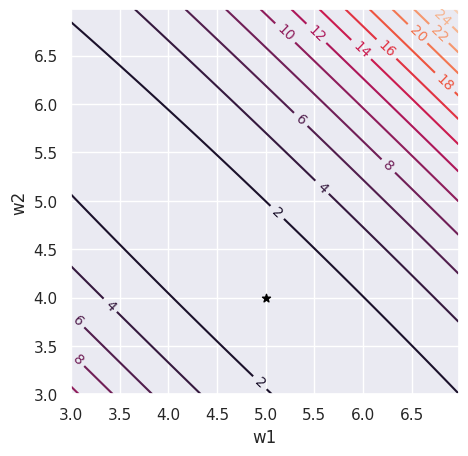

In [ ]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs)
p = plt.contour(X1, X2, mses_coefs, levels=15);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w1');
plt.ylabel('w2');
plt.scatter(w_true[1], w_true[2], c='black', marker='*');


### Perform gradient descent

In [ ]:
itr = 500
lr = 0.9
w_init = [w_true[0], 3, 7]

In [ ]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient

### Visualize gradient descent

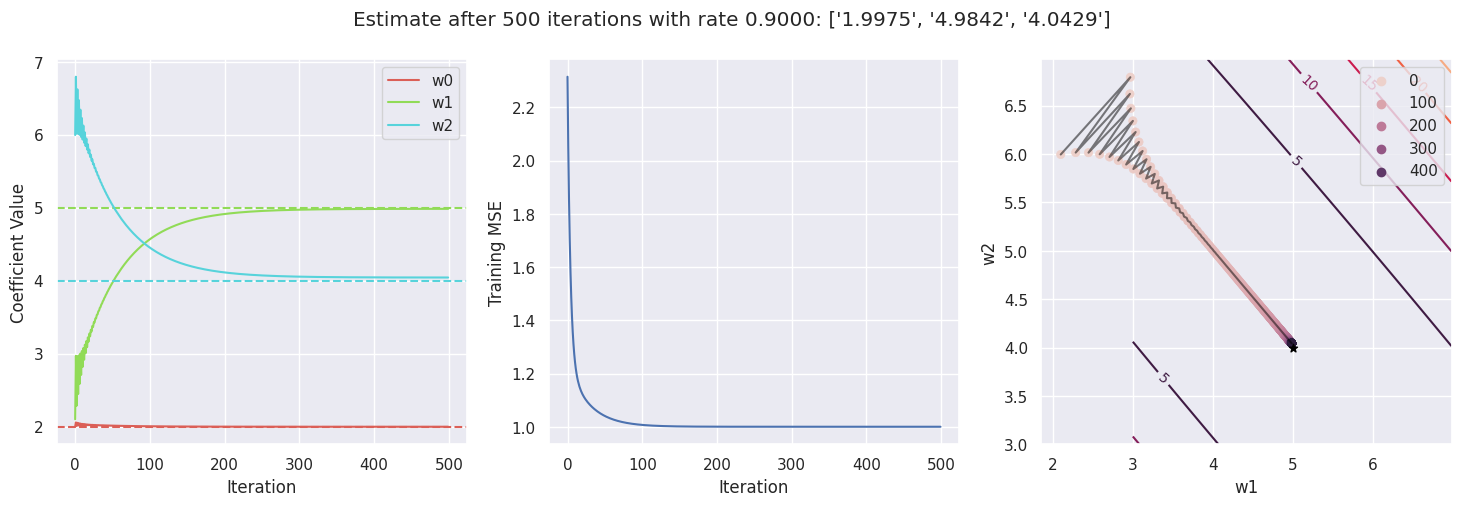

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1);

for n, w in enumerate(w_true):
  plt.axhline(y=w, linestyle='--', color=colors[n]);
  sns.lineplot(x=np.arange(itr), y=w_steps[:,n], color=colors[n], label='w' + str(n));
plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

plt.subplot(1, 3, 2);
sns.lineplot(x=np.arange(itr), y=mse_steps);
#plt.yscale("log")
plt.xlabel("Iteration");
plt.ylabel("Training MSE");


plt.subplot(1, 3, 3);
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w1');
plt.ylabel('w2');
sns.lineplot(x=w_steps[:,1], y=w_steps[:,2], color='black', sort=False, alpha=0.5);
sns.scatterplot(x=w_steps[:,1], y=w_steps[:,2], hue=np.arange(itr), edgecolor=None);
plt.scatter(w_true[1], w_true[2], c='black', marker='*');

plt.suptitle("Estimate after %d iterations with rate %s: %s" %
          (itr, "{0:0.4f}".format(lr), ["{0:0.4f}".format(w) for w in w_star]));

### Other things to try

-   What happens if we increase the learning rate (try e.g. 0.9)?
-   What happens if we change the initial “guess”?

### Momentum

In [ ]:
def gd_step_momentum(w, X, y, lr, eta, v):
  # use current parameters to get y_hat, error
  y_hat = np.dot(X,w)
  error = y_hat-y
  # compute gradient and velocity
  grad = np.matmul(X.T, error)
  v_new = eta*v - (lr/X.shape[0])*grad
  # update weights
  w_new = w + v_new

  # we don't have to actually compute MSE
  # but I want to, for visualization
  mse = np.mean(error**2, axis=0)

  return (w_new, mse, grad, v_new)

In [ ]:
itr = 100
lr = 0.06
eta = 0.95
w_init = [w_true[0], 3, 7]

In [ ]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))
v_steps = np.zeros((itr, len(w_init)))

w_star = w_init
velocity = np.zeros(len(w_init))
for i in range(itr):
  w_star, mse, gradient, velocity = gd_step_momentum(w_star, X, y, lr, eta, velocity)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient
  v_steps[i] = velocity

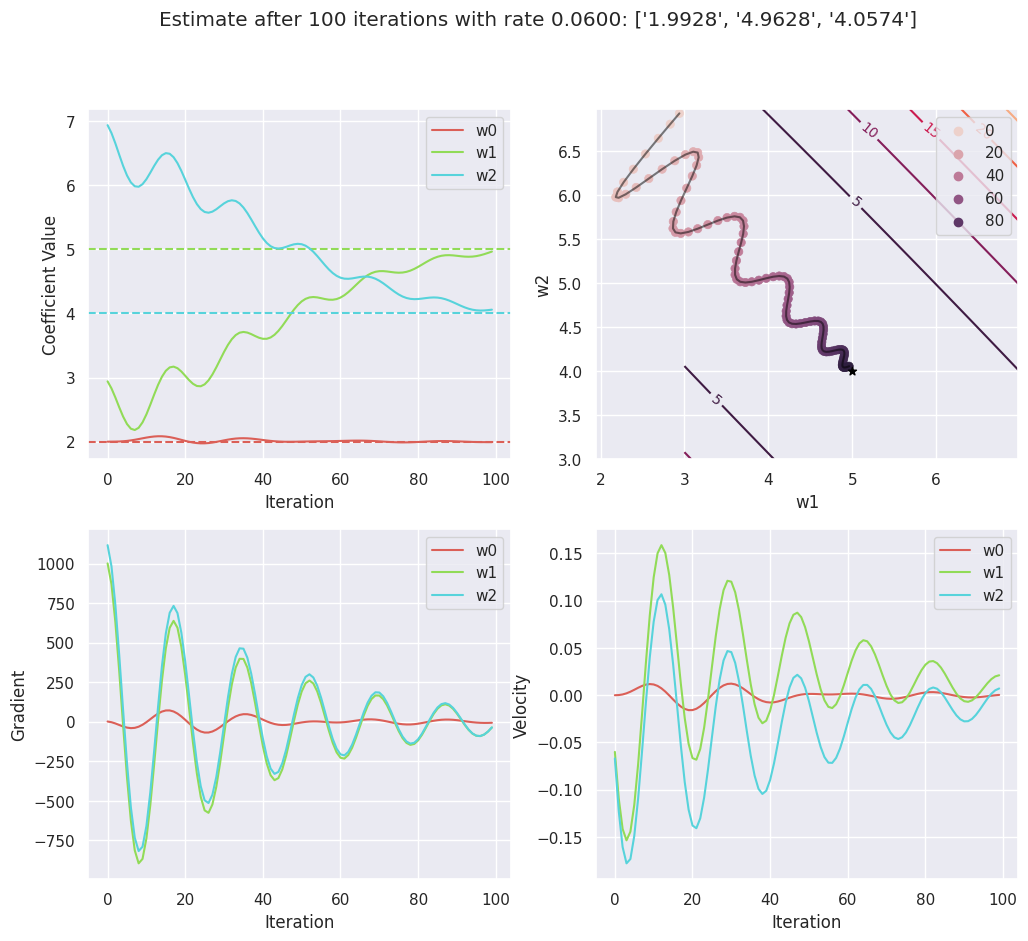

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1);

for n, w in enumerate(w_true):
  plt.axhline(y=w, linestyle='--', color=colors[n]);
  sns.lineplot(x=np.arange(itr), y=w_steps[:,n], color=colors[n], label='w' + str(n));
plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

plt.subplot(2, 2, 2);
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w1');
plt.ylabel('w2');
sns.lineplot(x=w_steps[:,1], y=w_steps[:,2], color='black', sort=False, alpha=0.5);
sns.scatterplot(x=w_steps[:,1], y=w_steps[:,2], hue=np.arange(itr), edgecolor=None);
plt.scatter(w_true[1], w_true[2], c='black', marker='*');

plt.subplot(2, 2, 3);
for n, w in enumerate(w_true):
  sns.lineplot(x=np.arange(itr), y=grad_steps[:,n], color=colors[n], label='w' + str(n));
plt.xlabel("Iteration");
plt.ylabel("Gradient");

plt.subplot(2, 2, 4);
for n, w in enumerate(w_true):
  sns.lineplot(x=np.arange(itr), y=v_steps[:,n], color=colors[n], label='w' + str(n));
plt.xlabel("Iteration");
plt.ylabel("Velocity");

plt.suptitle("Estimate after %d iterations with rate %s: %s" %
          (itr, "{0:0.4f}".format(lr), ["{0:0.4f}".format(w) for w in w_star]));
